In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Sumit Kumar/Desktop/PLACEMENT/Python_Diwali_Sales_Analysis/Diwali Sales Data.csv",encoding = 'unicode_escape')

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# DATA CLEANING

In [5]:
#Dropping blank and unrelated Columns
data.drop(['Status','unnamed1'],axis =1 ,inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
#Finding columns that contain any null values
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
data.shape

(11251, 13)

In [9]:
# Dropping all the null values
data.dropna(inplace = True)

In [10]:
#Changing data types of 'Amount'
data.Amount = data.Amount.astype('int')

In [11]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

#      Gender

In [14]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

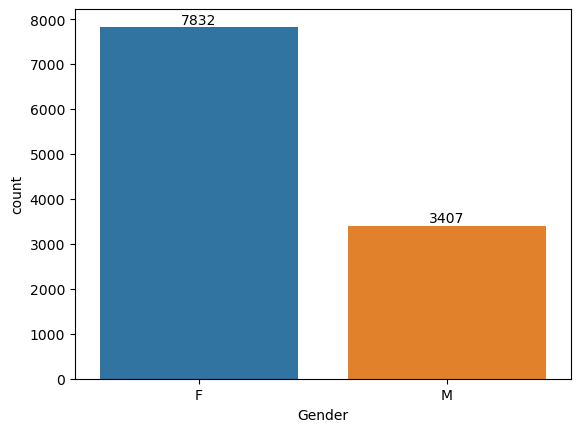

In [15]:
#Plotting Shopping Count Gender Wise
ax = sns.countplot( x= 'Gender',data = data)
for bars in ax.containers:
    ax.bar_label(bars)

Insights = From above graph we can see that the number of Females are more than Males in terms of frequent shopping.

<Axes: xlabel='Gender', ylabel='Amount'>

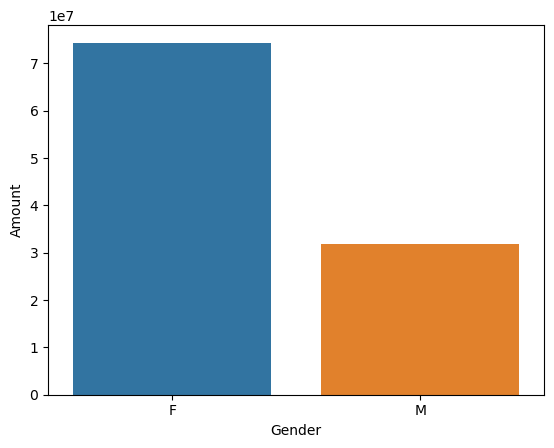

In [16]:
# Gender Vs Total Amount
Gender_Sales_Amount = data.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)
sns.barplot(x = 'Gender',y ='Amount',data = Gender_Sales_Amount)


Insights: Above Graph shows that Female spends much that that of Male customers.

# AGE

In [17]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

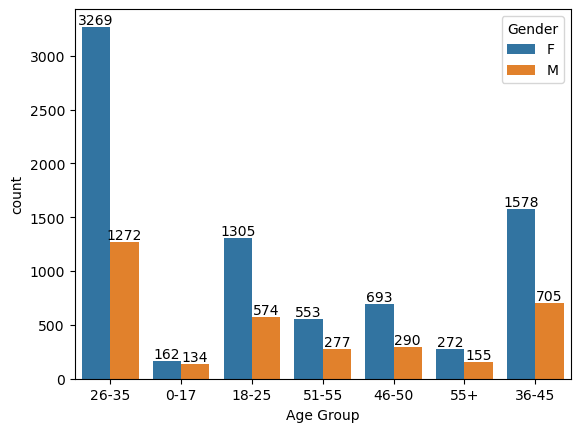

In [18]:
# Age Group Wise Shopping Count 
ax = sns.countplot(data=data, x = 'Age Group' , hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

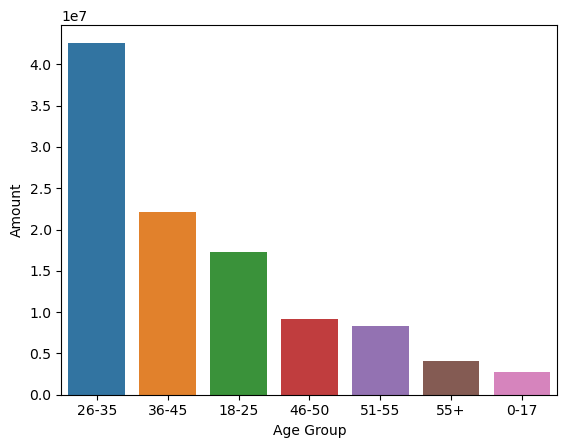

In [29]:
# Age Group Vs Total Amount 
Sales_Age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=Sales_Age)

Above graph shows that the most of the buyers are of the age category 26-35 years and least are of the category of 0-17 years.

# STATE

In [30]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

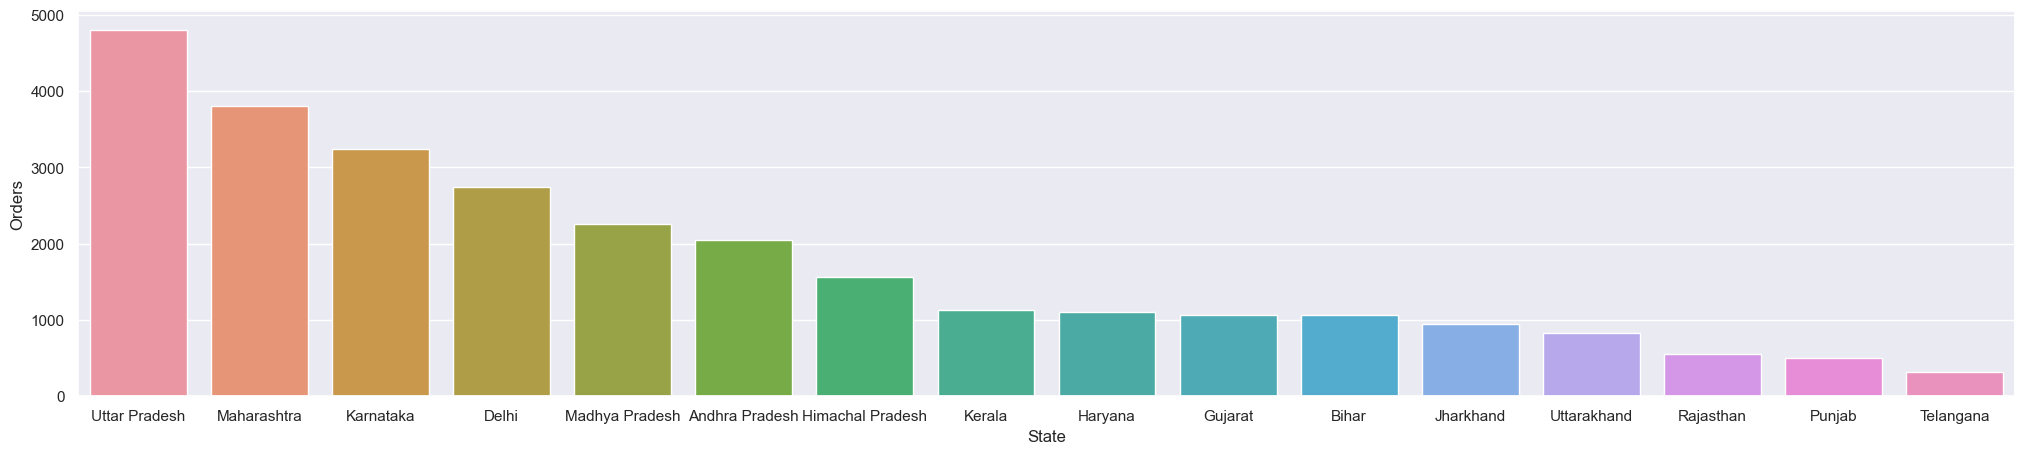

In [55]:
# Total number of orders from all 16 states 
Sales_State = data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=Sales_State,x='State',y='Orders')

Insights : Above graphs shows that the most number of orders were done in Uttar Pradesh and least were done in Telangana.

<Axes: xlabel='State', ylabel='Amount'>

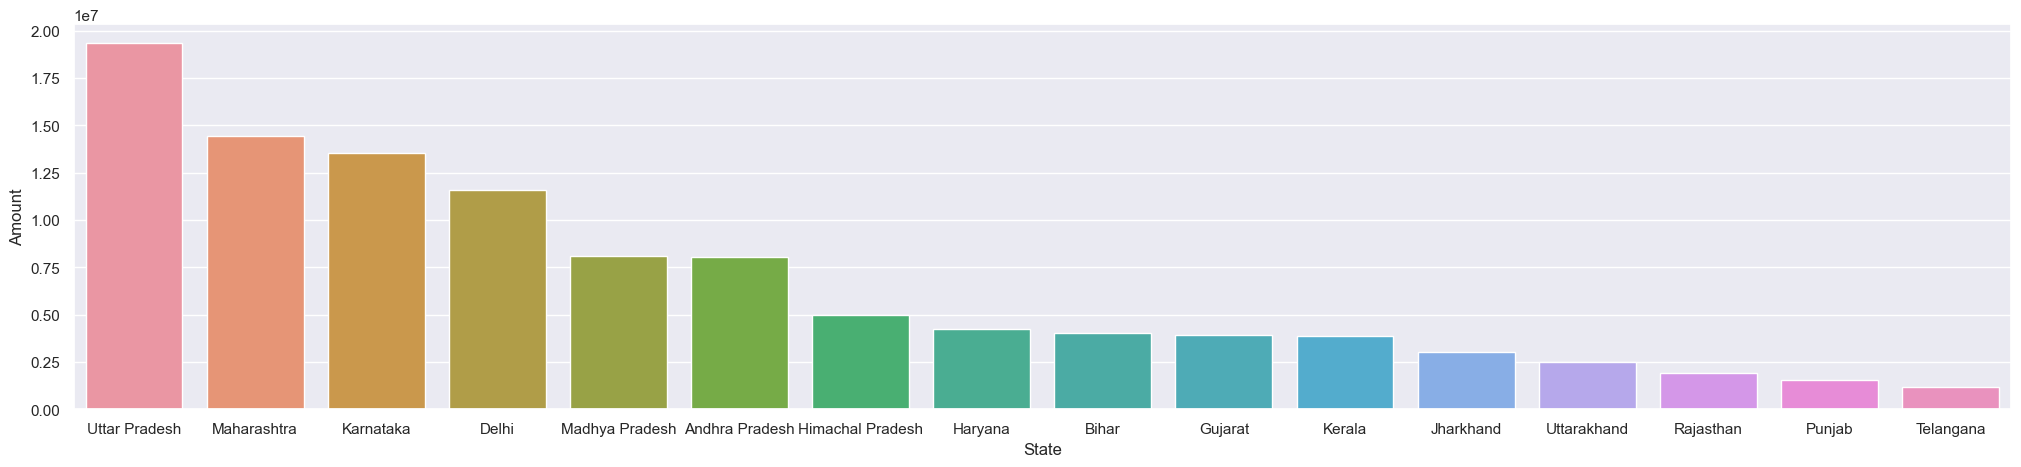

In [57]:
# Total Amount spend by all 16 states 
Sales_State = data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=Sales_State,x='State',y='Amount')

# MARITAL STATUS

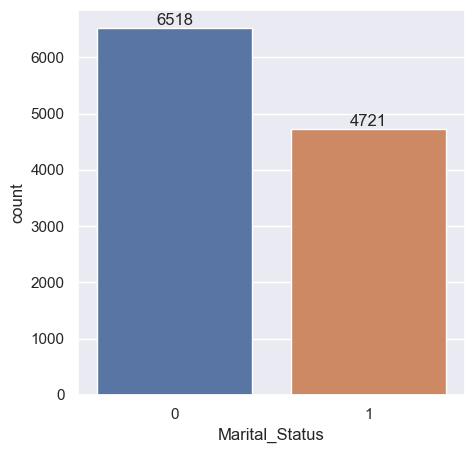

In [66]:
# Purchasing power of married and unmarried people.
ax = sns.countplot(data = data ,x = 'Marital_Status')
sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

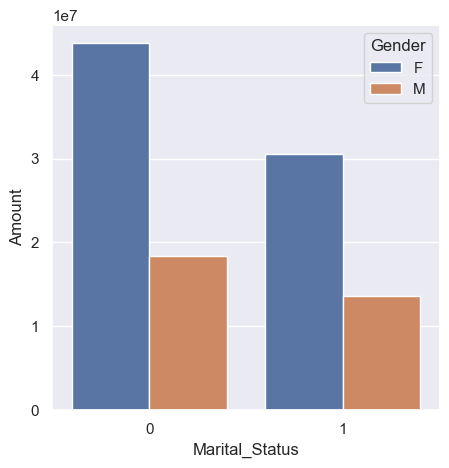

In [68]:
# Total Amount spend married couples 
Sales_State = data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=Sales_State,x='Marital_Status',y='Amount',hue='Gender')

Insights : Married Couples have higher purchasing power as compared to unmarried one and among married , females have spent
           more amount on shopping.

# Occupation

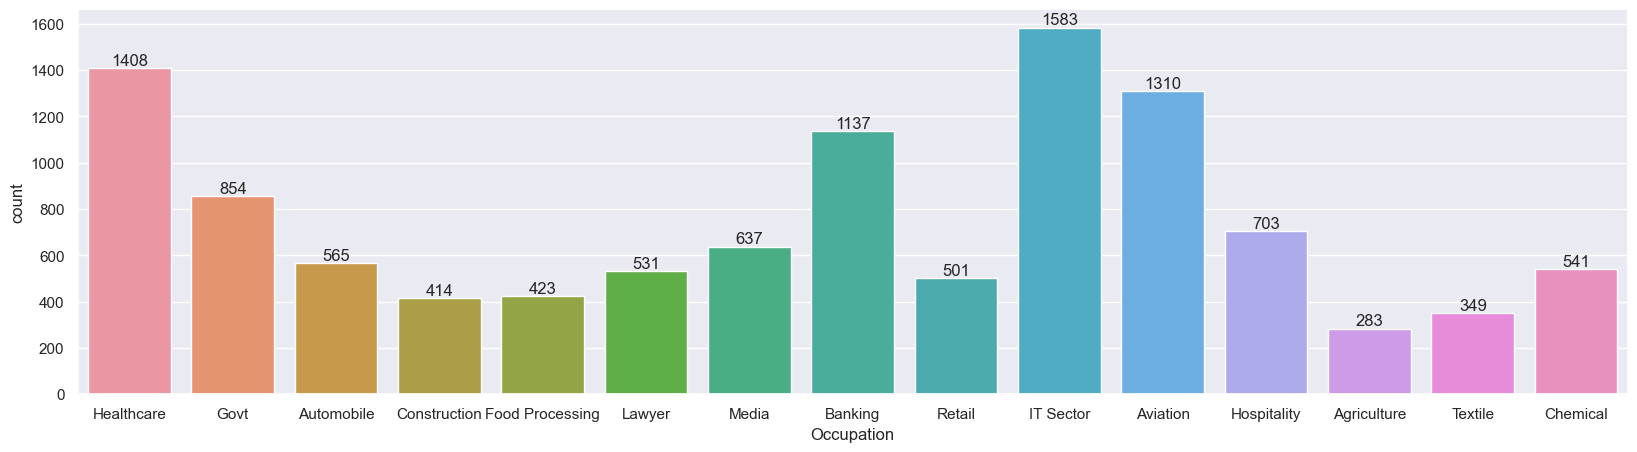

In [75]:
# Occupation Vs Purchasing Power
ax = sns.countplot(data = data ,x = 'Occupation')
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

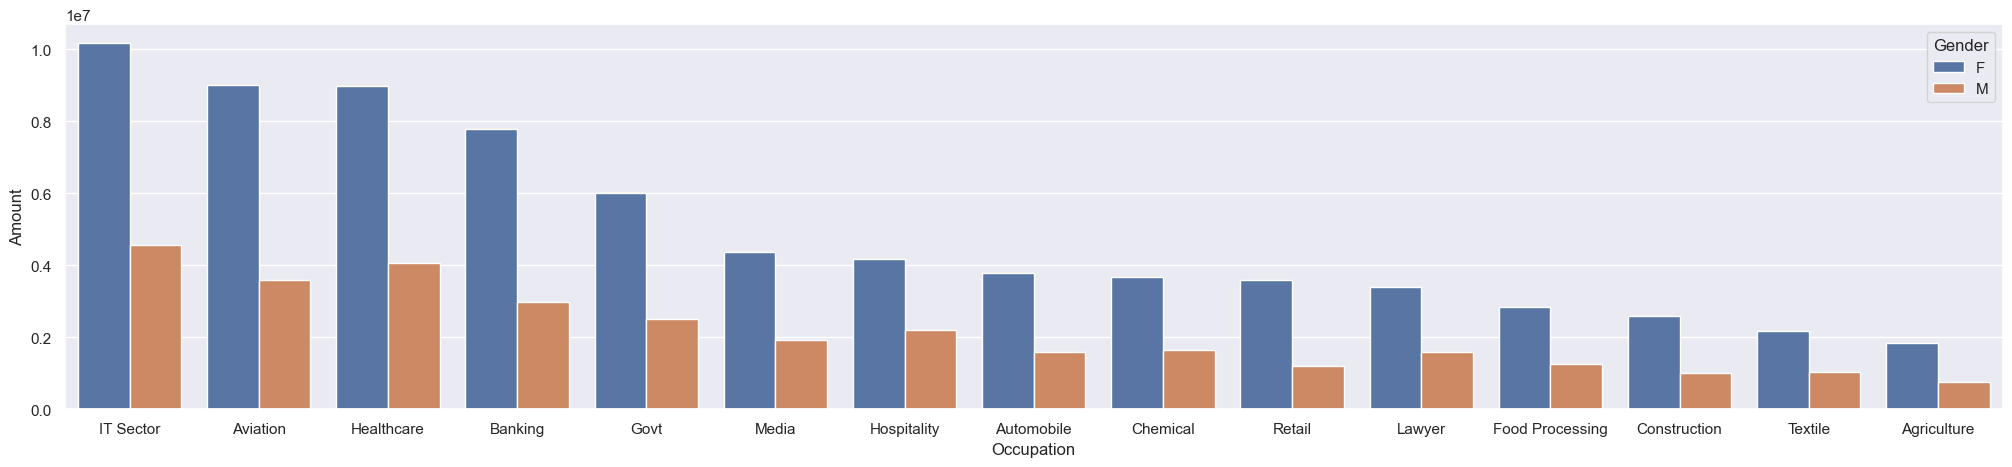

In [79]:
# Occupation Vs Amount Spent Vs Gender
Sales_State = data.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=Sales_State,x='Occupation',y='Amount',hue='Gender')

Insights : Above analysis shows that most of the buyers are female from IT Sector,Aviation and Healthcare

# Product Category

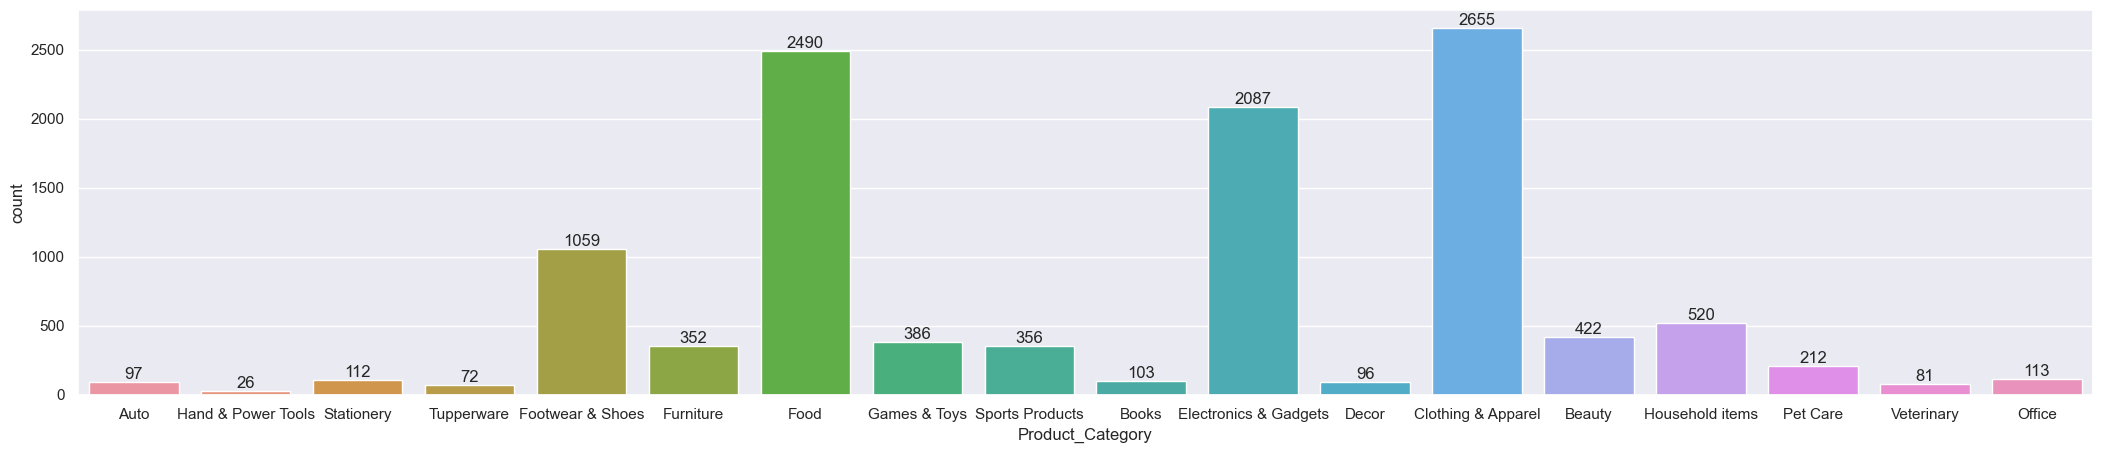

In [89]:
#Types of Product  that were purchased
ax = sns.countplot(data = data ,x = 'Product_Category')
sns.set(rc={'figure.figsize':(26,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

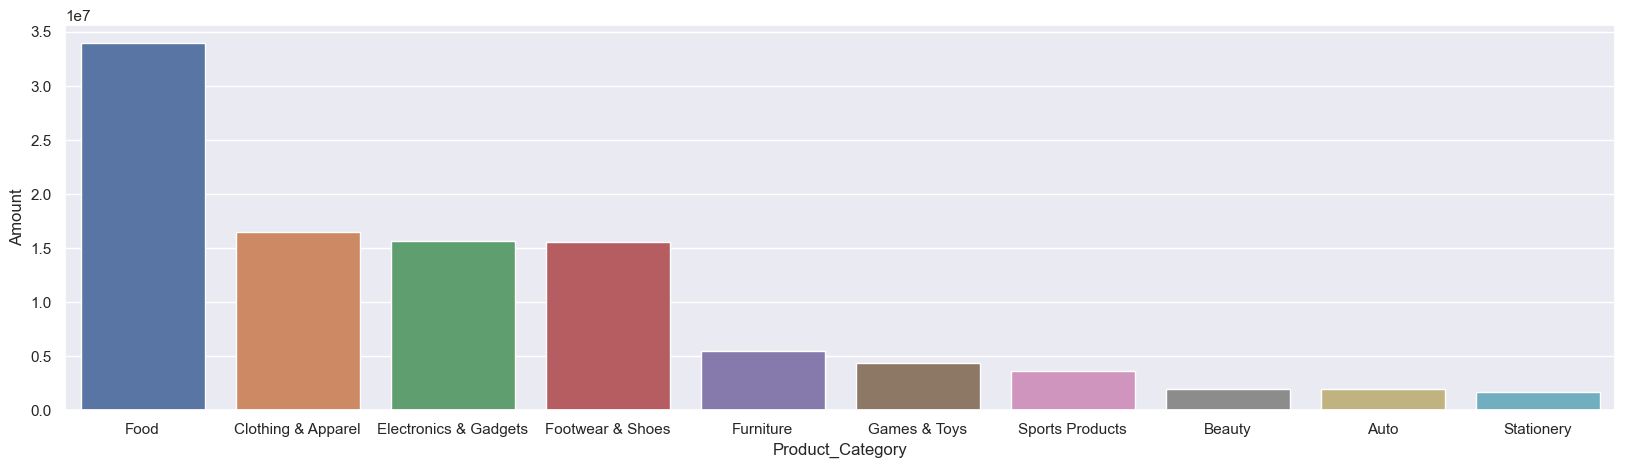

In [100]:
# Amount spent on purchasing top 10 types of Products
Sales_State = data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_State,x='Product_Category',y='Amount')

<Axes: xlabel='Product_Category', ylabel='Amount'>

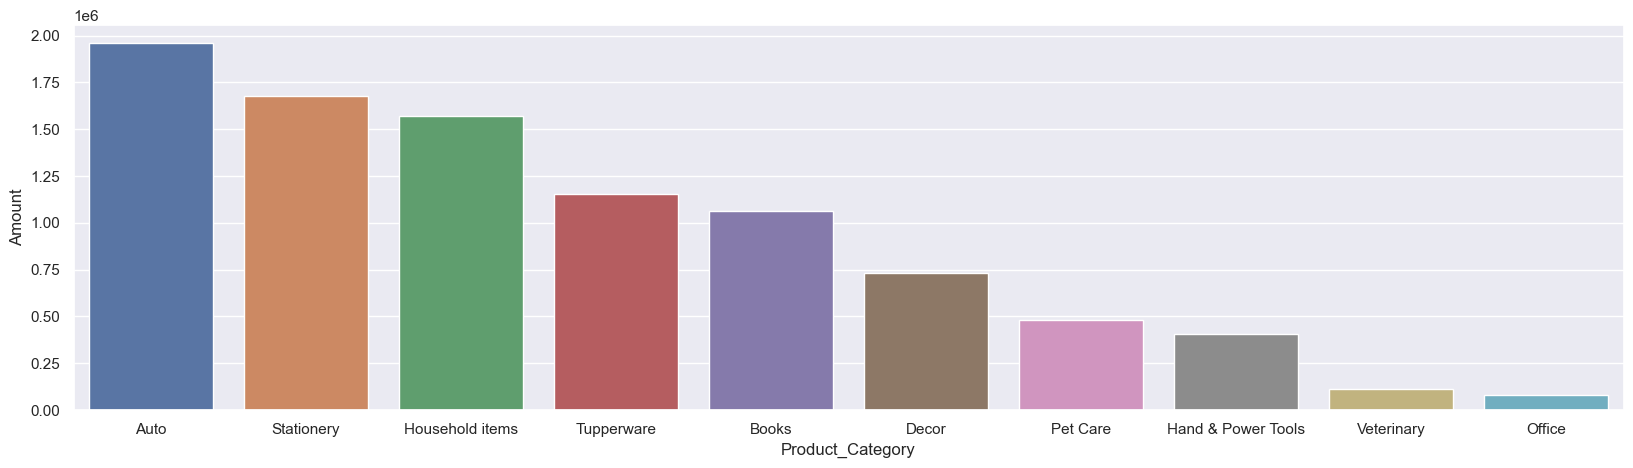

In [101]:
# Amount spent on purchasing bottom 10 types of Products
Sales_State = data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).tail(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_State,x='Product_Category',y='Amount')

From above graphs it is clear that most sold products are from Food,Cloth & Apparels,Electronic Gadgets

<Axes: xlabel='Product_ID', ylabel='Orders'>

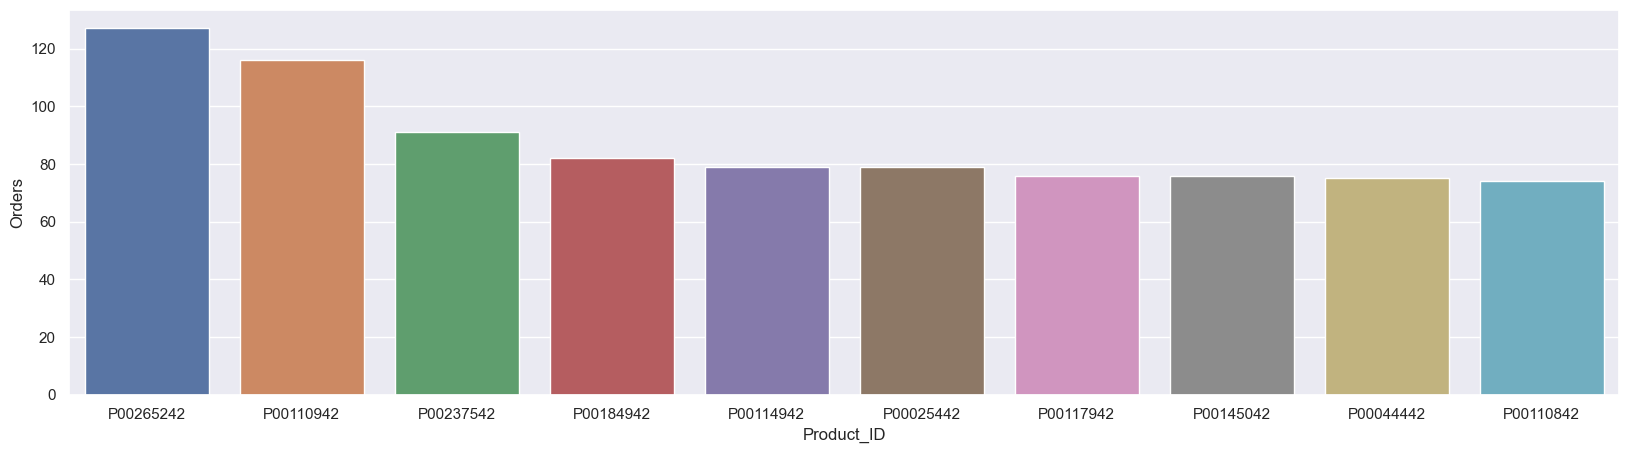

In [104]:
# Top sold products
Sales_State = data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=Sales_State,x='Product_ID',y='Orders')

Conclusion : Mostly the buyers are females from the states of UP ,Maharashtra,Karnataka and their Job Profile is IT,HealthCare,Aviation.More Over they tend to spent more on food,clothing and electronic apparatus.      